In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.getcwd()
os.chdir('C:\\Users\\Dubey\\Downloads')

In [35]:
import chardet
with open('customer_booking.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [53]:
df=pd.read_csv('customer_booking.csv',encoding='ISO-8859-1')
df.shape

(50000, 14)

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5


In [54]:
df['wants_extra_baggage']=df['wants_extra_baggage'].astype('object')
df['wants_preferred_seat']=df['wants_preferred_seat'].astype('object')
df['wants_in_flight_meals']=df['wants_in_flight_meals'].astype('object')
df['booking_complete']=df['booking_complete'].astype('object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int8   
 2   trip_type              50000 non-null  int8   
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int8   
 7   route                  50000 non-null  int16  
 8   booking_origin         50000 non-null  int8   
 9   wants_extra_baggage    50000 non-null  int8   
 10  wants_preferred_seat   50000 non-null  int8   
 11  wants_in_flight_meals  50000 non-null  int8   
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int8   
dtypes: float64(1), int16(1), int64(4), int8(8)
memory usag

In [48]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

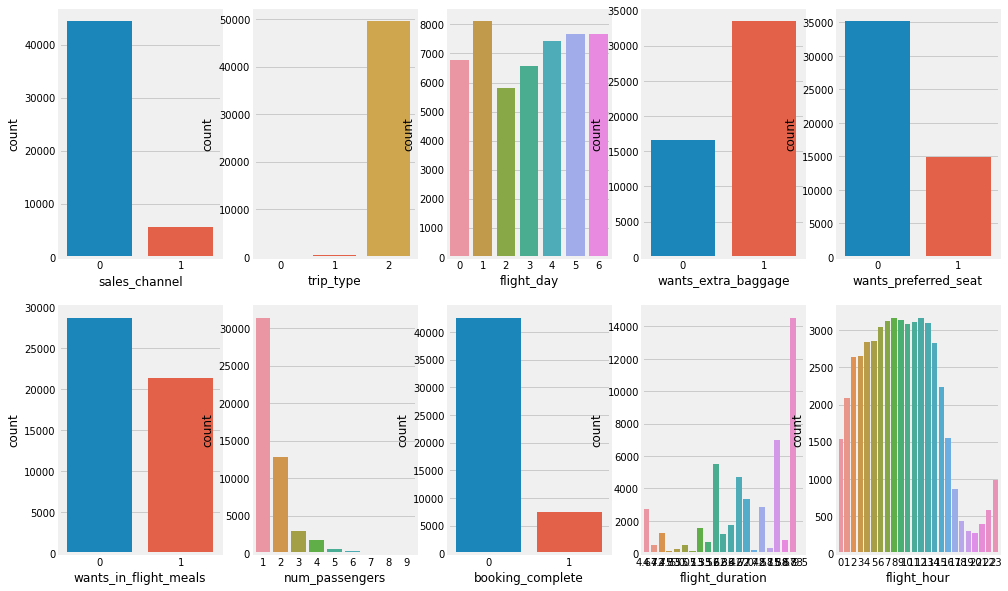

In [51]:
fig_dims=(15,10)
fig,axes=plt.subplots(nrows=2,ncols=5,figsize=fig_dims);
sns.countplot(data=df,x='sales_channel',ax=axes[0][0]);
sns.countplot(data=df,x='trip_type',ax=axes[0][1]);
sns.countplot(data=df,x='flight_day',ax=axes[0][2]);
sns.countplot(data=df,x='wants_extra_baggage',ax=axes[0][3]);
sns.countplot(data=df,x='wants_preferred_seat',ax=axes[0][4]);
sns.countplot(data=df,x='wants_in_flight_meals',ax=axes[1][0]);
sns.countplot(data=df,x='num_passengers',ax=axes[1][1]);
sns.countplot(data=df,x='booking_complete',ax=axes[1][2]);
sns.countplot(data=df,x='flight_duration',ax=axes[1][3]);
sns.countplot(data=df,x='flight_hour',ax=axes[1][4]);

In [42]:
for feature in df: 
    if df[feature].dtype =='object': 
        df[feature] = pd.Categorical(df[feature]).codes

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [43]:
X = df.drop('num_passengers',axis=1)
y= df[['num_passengers']]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df['num_passengers'])

In [56]:
# invoke the LinearRegression function 
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# This adds the constant term to the Simple Linear Regression.

# To build linear regression_model
import statsmodels.api as sm

X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

In [57]:
# fitting 

mod1 = sm.OLS(y_train, X_train)
res1 = mod1.fit()

In [58]:
# let's print the regression summary

res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         num_passengers   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     245.8
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:56:55   Log-Likelihood:                -48823.
No. Observations:               35000   AIC:                         9.767e+04
Df Residuals:                   34986   BIC:                         9.779e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.5216      0.089     17.186      0.000       1.348       1.695
sales_channel            -0.0068      0.017     -0.404      0.686      -0.040       0.026
trip_type                 0.0625      0.040      1.551      0.121      -0.016       0.142
purchase_lead             0.0023   5.83e-05     40.198      0.000       0.002       0.002
length_of_stay           -0.0035      0.000    -21.676      0.000      -0.004      -0.003
flight_hour               0.0010      0.001      1.043      0.297      -0.001       0.003
flight_day                0.0012      0.003      0.447      0.655      -0.004       0.006
route                    -0.0002   2.34e-05     -6.963      0.000      -0.000      -0.000
booking_origin            0.0005      0.000      2.769      0.006       0.000       0.001
wants_extra_baggage       0.3136      0.012     26.815      0.000       0.291       0.337
wants_preferred_seat      0.0181      0.012      1.482      0.138      -0.006       0.042
wants_in_flight_meals     0.0444      0.011      3.907      0.000       0.022       0.067
flight_duration          -0.0517      0.004    -13.899      0.000      -0.059      -0.044
booking_complete          0.0115      0.015      0.773      0.440      -0.018       0.041
==============================================================================
Omnibus:                    20014.194   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           199173.805
Skew:                           2.618   Prob(JB):                         0.00
Kurtosis:                      13.448   Cond. No.                     8.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for const is -0.006768807861643583
The coefficient for sales_channel is 0.06253921178805073
The coefficient for trip_type is 0.0023421381429974564
The coefficient for purchase_lead is -0.0034649056344938298
The coefficient for length_of_stay is 0.0010061928636422063
The coefficient for flight_hour is 0.0011532138787527148
The coefficient for flight_day is -0.00016318200790027548
The coefficient for route is 0.00046171779168827434
The coefficient for booking_origin is 0.3136284054435061
The coefficient for wants_extra_baggage is 0.018144156447579916
The coefficient for wants_preferred_seat is 0.04444355112279186
The coefficient for wants_in_flight_meals is -0.051695866310719374
The coefficient for flight_duration is 0.011504134299379158


IndexError: index 13 is out of bounds for axis 0 with size 13

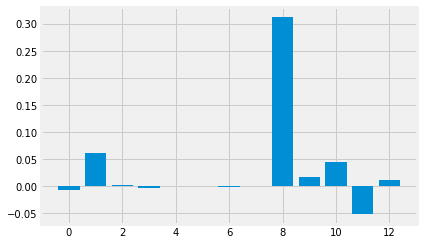

In [61]:
# plot feature importance
plt.bar([x for x in range(len( regression_model.coef_[0]))],  regression_model.coef_[0])
plt.show()

# TEXT ANALYTICS

Data is originally from from Skytrax 
If you visit https://www.airlinequality.com you can see that there is a lot of data there. we are only interested in reviews related to British and the Airline itself.

If you navigate to this links: https://www.airlinequality.com/airline-reviews/british-airways you will see this data.

In [18]:
dft=pd.read_csv('British_reviews_skytrax.csv (1).zip',index_col= 0)

In [19]:
dft.head()

,reviews
0,✅ Trip Verified | I was flying to Warsaw for ...
1,✅ Trip Verified | Booked a BA holiday to Marr...
2,✅ Trip Verified | Extremely sub-par service. H...
3,✅ Trip Verified | I virtually gave up on Brit...
4,✅ Trip Verified | I was pleasantly surprised ...


### Text preprocessing functions
things to make sure there are:
1. No useless text data.
2. No Uppercase letters (turn all letters to lowercase).
3. No Punctuations.
4. Tokenization and stop words handling.

In [20]:
import string   # we need it for Punctuations removal
from stop_words import get_stop_words  
from nltk.tokenize import word_tokenize # it turn text to list but more faster

In [21]:
# preprocessing function for sentiment analysis
def sentiment_clean_text(text):
    '''
    this function take text and clean it  

    Parameters
    ----------
    text : string before preprocessing.

    Returns
    -------
    text : string after preprocessing.

    '''


    # A. first step remove useless text data (if there are any) note: i don't need data before | so I will remove it 
    if '|' in text:
        text =  text.split('|')[1]   
       
    # B. second turn letters into lowercase 
    text = text.lower()
        
    # C. third remove all Punctuations.
    text = text.translate(str.maketrans('','',string.punctuation))
    
    return text


# preprocessing function for emotion analysis
def emotion_clean_text(text):
    '''
    this function take text and clean it then turn it to list of words 

    Parameters
    ----------
    text : string 

    Returns
    -------
    text_list : list of text words after cleaning.

    '''
        
    # D. forth step Tokenization and stop words 
        
    # Tokenizaiton: turning string into list of words.
    # Stop words: words without meaning for sentiment analysis.

        
    # Tokenizaiton
    text = word_tokenize(text,"english")
    
    # handeling the stop words but what are the stop words 
    stop_words = get_stop_words('english') #or we can use stop_words = stopwords.words('english')

    # Removing stop words from the tokenized words list
    text_list = []
    
    for word in text:
        if word not in stop_words:
            text_list.append(word)

       
    # return the list of words
    return text_list

### Emotion text dectionary function

In [22]:
# Emotion maping

def emotion_maping (file,di): 
    '''
    this function take emotions file and store emotions in dictionary 

    Parameters
    ----------
    file : emotions file  

    Returns
    -------
    di : emotions dictionary.
    
    '''
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        di[word] = emotion
            
    return di

### Vader Sentiment analysis function

In [23]:
# let's import the needed packages 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# function to carry out the     
def sentiment_analyze(text):
    
    scores = SentimentIntensityAnalyzer().polarity_scores(text) # return dictionary of scores
    
    if (scores['neg'] > scores['pos']):
        
        return 0
    
    else:
        return 1

### Apply function to dataset

In [24]:
# define needed data structures
cleaned_text = ""
score = 0
emotion_dict = {}
words_score_dict = {}
moods_list_st = []

# create category list for better understanding 
airline_main_categories = ['flight','service','seat','food','crew','time','good','class','cabin','seats','staff','business']
temp_category_list = []

In [25]:
# get the emotion dictionary ready
emotion_file = pd.read_csv('archive.zip') 
emotion_dict = emotion_maping(emotion_file,emotion_dict)
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dubey\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
# loop for all reviews in Skytrax dataFrame  
for i in range(len(dft)):
    
    # get the review of index i
    text = str(dft['reviews'][i])
    
    # step 1: let's clean the text and assign cleaned list to dataFrame 
    # simple clean 
    cleaned_text= sentiment_clean_text(text)
    
     #Step 2: sentiment Analysis
    score = sentiment_analyze(cleaned_text)
    moods_list_st.append(score)
    
 # Step 3: advanced clean for emotions
    cleaned_text_list = emotion_clean_text(cleaned_text)
    dft['reviews'][i] = cleaned_text_list 
    
    # Step 4: category list builder
    for cat in airline_main_categories:
        if cat in cleaned_text_list:
            temp_category_list.append(cat)  

# now let's create new column for moods for skytrax
dft['mood'] = moods_list_st

### Plot for Vader Sentiment Scores

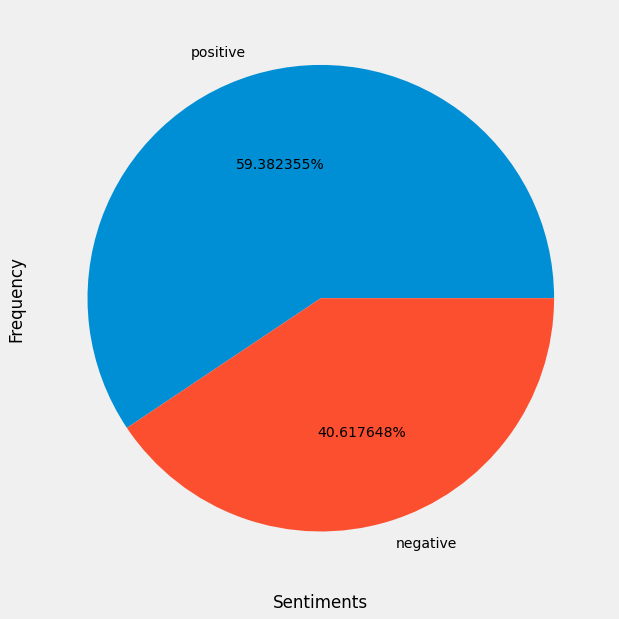

In [27]:
from collections import Counter

# plot sentiment and emotions 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


# get summary dictionary for sentiment 
moods_list_all = moods_list_st 
mood_summary = dict(Counter(moods_list_all))

# rename dictionary keys before ploting 
mood_summary['positive'] = mood_summary.pop(1)
mood_summary['negative'] = mood_summary.pop(0)

fig, ax = plt.subplots()
#ax.bar(mmod_summary.keys(), mmod_summary.values())
ax.pie( mood_summary.values(), labels = mood_summary.keys(), autopct='%.6f%%')

# change the width and length of plot 
fig.set_figwidth(10)
fig.set_figheight(10)

# label the plot 
plt.xlabel('Sentiments')
plt.ylabel('Frequency')
#plt.savefig('Sentiments.png')
plt.show()

### Plot For Frequent Categories

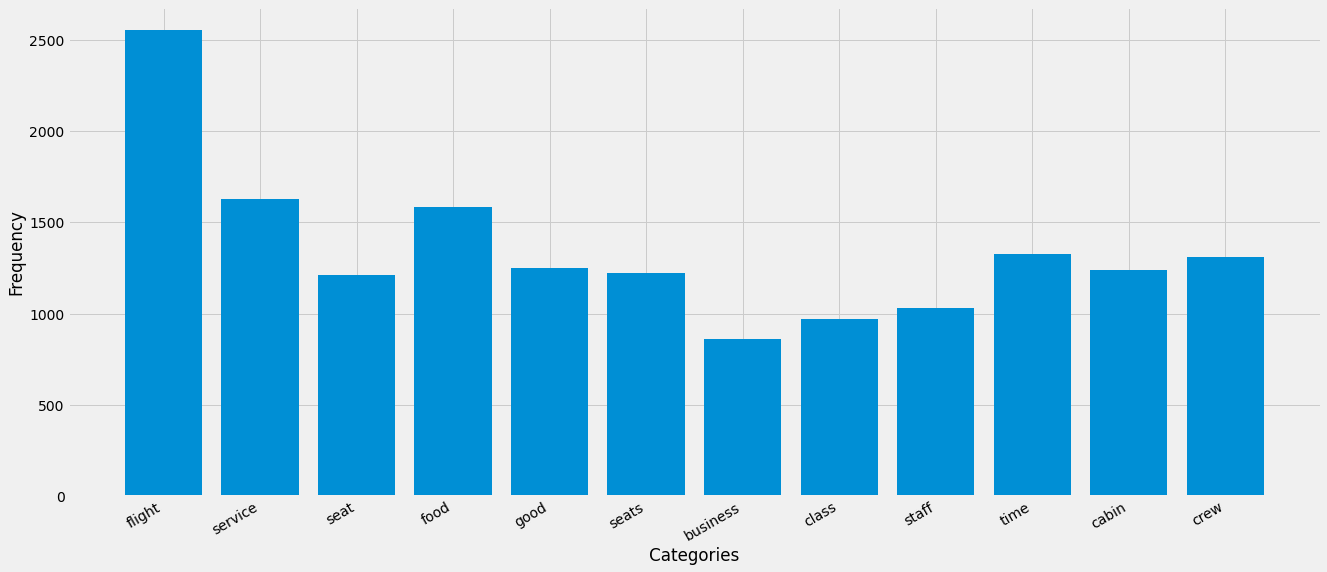

In [28]:
# turn the emotion list into dictionary 
cat_score_dict = dict(Counter(temp_category_list))

# now let's go more Specifically and just choose emotions with freq more than 10
more_than_10_cat = dict( (key, value) for (key, value) in cat_score_dict.items() if value > 10 )


fig, ax = plt.subplots()
ax.bar(more_than_10_cat.keys(), more_than_10_cat.values())

# the fit the text undre graph 
fig.autofmt_xdate()

# change the width and length of plot 
fig.set_figwidth(20)
fig.set_figheight(10)

# label the plot 
plt.xlabel('Categories')
plt.ylabel('Frequency')

#save the graph and show it 
#plt.savefig('More_than_10_categories.png')
plt.show()

### Word Cloud for Categories

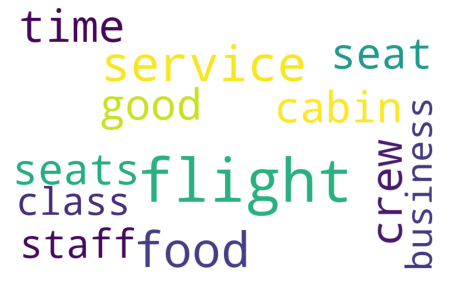

In [32]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(cat_score_dict) 

plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()